# Post-Lab Assignment: Bioindicators Analysis

In this notebook, you will analyze creek metrics data to compare North and South Fork regions. You will create boxplots, perform randomization testing, and interpret the results.

Make sure to answer all the questions in bCourses after running the code cells.

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the creek metrics data
data = pd.read_csv('post-lab_data_Sp25.csv')

# Display the first few rows of the dataset
data.head()


,Group,Fork,Richness,EPT,FBI,Filters,Predators,Shannon
0,1,North,9,25,5.28,43,16,1.83
1,2,North,8,30,5.06,50,18,1.82
2,3,North,9,28,5.28,43,15,1.83
3,4,North,9,18,5.12,46,16,1.96
4,5,North,7,32,5.40,40,13,2.03


## Create Boxplots for Metrics

Create boxplots comparing the North and South Forks for Richness, FBI, EPT, Filters, and Predator metrics.

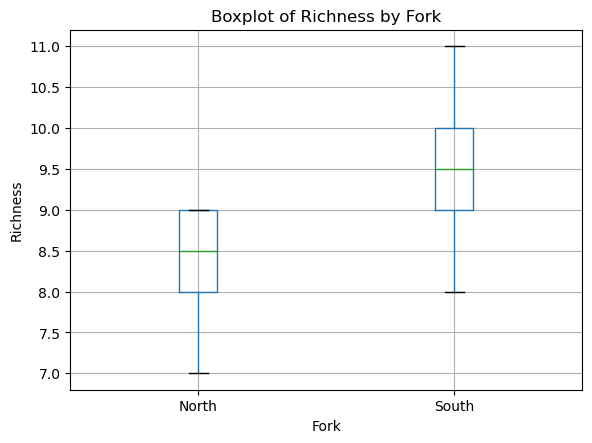

In [10]:
# List of metrics to plot (adjust as needed based on question variation)
metric_to_plot = ['Richness']  # Change these metric as per the question

# Create boxplots for each selected metric, comparing North and South Fork
for metric in metric_to_plot:
    data.boxplot(column=metric, by='Fork')
    plt.title(f'Boxplot of {metric} by Fork')
    plt.suptitle('')  # Remove automatic title
    plt.xlabel('Fork')
    plt.ylabel(metric)
    plt.show()


## Randomization Testing

Perform randomization testing to assess whether the observed differences in different biodicator metrics are statistically significant.

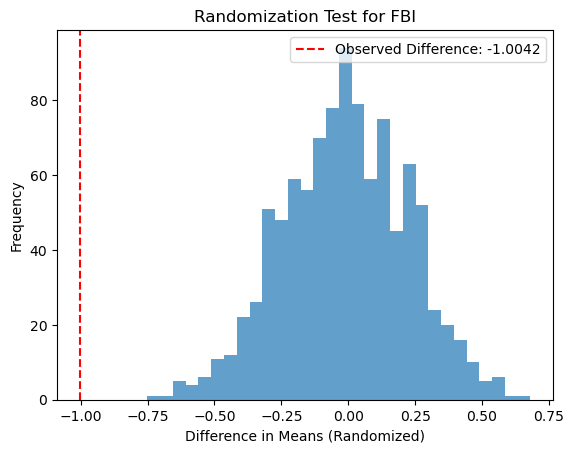

Observed Difference: -1.0041666666666664
P-value: 0.0


In [13]:
# Randomization testing on the FBI metric (change to other metrics as per question variation)

# Function to perform a single randomization
def randomization_test(data, metric, n_iterations=1000):
    observed_difference = data.groupby('Fork')[metric].mean().diff().iloc[-1]
    randomized_diffs = []

    for _ in range(n_iterations):
        # Shuffle the 'Fork' labels
        shuffled = data.copy()
        shuffled['Fork'] = np.random.permutation(shuffled['Fork'])
        # Compute the difference between the means after shuffling
        randomized_diff = shuffled.groupby('Fork')[metric].mean().diff().iloc[-1]
        randomized_diffs.append(randomized_diff)

    # Calculate the p-value (how often random difference exceeds observed difference)
    p_value = np.mean(np.abs(randomized_diffs) >= np.abs(observed_difference))

    # Plot the distribution of randomized differences
    plt.hist(randomized_diffs, bins=30, alpha=0.7)
    plt.axvline(observed_difference, color='red', linestyle='--', label=f'Observed Difference: {observed_difference:.4f}')
    plt.xlabel('Difference in Means (Randomized)')
    plt.ylabel('Frequency')
    plt.title(f'Randomization Test for {metric}')
    plt.legend()
    plt.show()

    return observed_difference, p_value

# Perform the randomization test for FBI (or change the metric as needed)
obs_diff, p_val = randomization_test(data, 'FBI')
print(f"Observed Difference: {obs_diff}")
print(f"P-value: {p_val}")


## Writing a Results Section

Carefull review figures you have generated. Write a proper interpretation of the results after generating boxplots and running the randomization test.